<a href="https://colab.research.google.com/github/alexlin1822/EyesCase/blob/main/current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount the google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Testing the mounting 
 #!ls "/content/drive/My Drive/Colab Notebooks/CNN/OCT2017/train"
!ls "/content/drive/My Drive/train"

drusen	normal


NORMAL-272910-4.jpeg


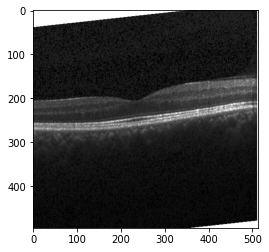

(496, 512)


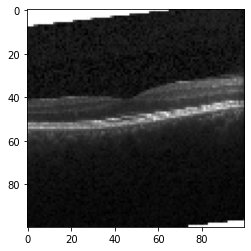

In [10]:
# Testing image loading 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR="/content/drive/My Drive/Colab Notebooks/CNN/OCT2017/train"
CATEGORIES=["NORMAL","DRUSEN"]
# DATADIR="/content/drive/My Drive/train"
# CATEGORIES=["normal","drusen"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
      print(img)
      img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      plt.imshow(img_array,cmap="gray")
      plt.show()
      break
    break

print (img_array.shape)

# Testing the resizing 
IMG_SIZE=100

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')

In [11]:

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

#shuffle the training_data
import random

random.shuffle(training_data)

for sample in training_data[:10]:
  print(sample[1])

100%|██████████| 8598/8598 [37:16<00:00,  3.84it/s]

0
1
0
1
1
1
1
0
0
0


In [4]:
X=[]
y=[]

for features, label in training_data:
  X.append(features)
  y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
#print (x)
#print (y)

In [5]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()




In [12]:
#deep learning
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "CNN-Testing"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y=np.array(y)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1, callbacks=[tensorboard])








Epoch 1/3
2/2 [==============================] - 9s 3s/step - loss: 1.9815 - accuracy: 0.5000 - val_loss: 0.3664 - val_accuracy: 1.0000
Epoch 2/3
2/2 [==============================] - 7s 2s/step - loss: 0.7653 - accuracy: 0.5000 - val_loss: 0.6310 - val_accuracy: 0.8333
Epoch 3/3
2/2 [==============================] - 7s 2s/step - loss: 0.6006 - accuracy: 0.7609 - val_loss: 0.4453 - val_accuracy: 0.8333
